In [ ]:
# Here we are first creating decision tree and then random forest (includes many decision trees) so that we can check whose accuracy is best.

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [32]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [33]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [35]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [36]:
features = ["pclass", "sex", "age", "fare", "embarked"]
target = ["survived"]

# handling missing data
imp_age = SimpleImputer(strategy="median")
df[["age"]]  = imp_age.fit_transform(df[["age"]])

imp_embarked = SimpleImputer(strategy="most_frequent")
df[["embarked"]] = imp_embarked.fit_transform(df[["embarked"]])

In [37]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [38]:
# Encoding

le = LabelEncoder()

df["sex"] = le.fit_transform(df["sex"])
df["embarked"] = le.fit_transform(df["embarked"])

In [39]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True


In [40]:
X = df[features]
y = df["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



In [11]:
# Decision tree

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("training accuracy:", accuracy_score(y_train, y_train_pred))
print("testing accuracy:", accuracy_score(y_test, y_test_pred))
# classic overfitting as decision tree tends to give and below we have created random forest who have resolved the problem of overfitting check its training and testing accuracy

training accuracy: 0.9775280898876404
testing accuracy: 0.770949720670391


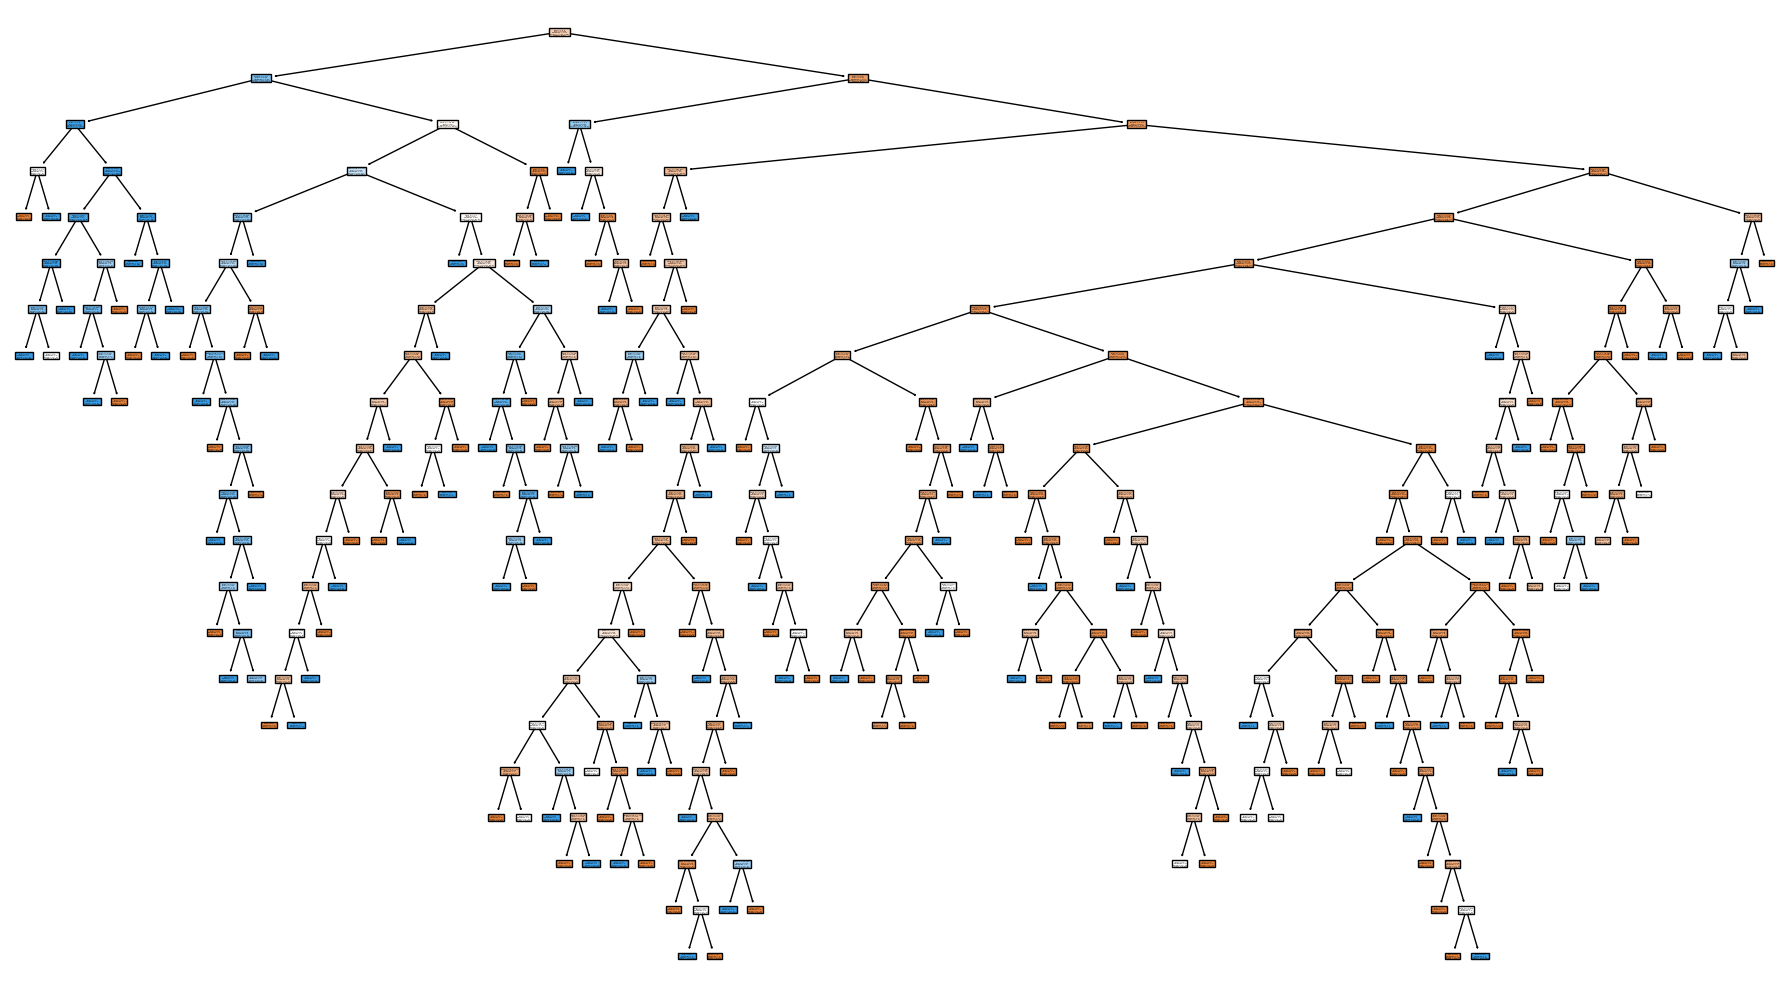

In [12]:
# decision tree plotting

from sklearn.tree import plot_tree

plt.figure(figsize=(18,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Died", "Survived"],
    filled=True
)
plt.tight_layout()

# Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(
    n_estimators = 201,
    oob_score = True
)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print("OOB score:", rfc.oob_score_)
print("testing accuracy:", accuracy_score(y_test, y_pred))

OOB score: 0.7991573033707865
testing accuracy: 0.776536312849162


# Random Forest Regressor

In [47]:
from sklearn.datasets import load_diabetes

df = load_diabetes(as_frame=True).frame
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [48]:
X = df.drop(columns = "target")
y = df["target"]

In [49]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [50]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(
    n_estimators = 301,
    oob_score = True
)

rfr.fit(X_train, y_train)

,n_estimators,301
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [28]:
y_pred = rfr.predict(X_test)

from sklearn.metrics import r2_score

print("OOB score:", rfr.oob_score_)
print("Test R²:", r2_score(y_test, y_pred))

OOB score: 0.4424292924865829
Test R²: 0.437423969301054


# Bagging Classifier

In [46]:
# using this bagging classifier or regressor we can train any model logistic, svm, knn or any model with different bootstrap samples of the data for this it is 201 SVC models.
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

model = SVC()

bagging = BaggingClassifier(
    model,
    n_estimators=201
)

bagging.fit(X_train, y_train)

y_pred = bagging.predict(X_test)

print("accuracy:", accuracy_score(y_test, y_pred))

accuracy: 0.6536312849162011


# Bagging regressor

In [52]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()

bagging = BaggingRegressor(
    model,
    n_estimators=201
)

bagging.fit(X_train, y_train)

y_pred = bagging.predict(X_test)

print("r2_score:", r2_score(y_test, y_pred))

r2_score: 0.44323020603786034
